BAGGING DEMONSTRATION
Original dataset size: 100
Number of trees: 10
Tree max depth: 6

Training tree 1/10...
  Bootstrap sample has 59/100 unique samples
Training tree 2/10...
  Bootstrap sample has 60/100 unique samples
Training tree 3/10...
  Bootstrap sample has 65/100 unique samples
Training tree 4/10...
  Bootstrap sample has 62/100 unique samples
Training tree 5/10...
  Bootstrap sample has 63/100 unique samples
Training tree 6/10...
  Bootstrap sample has 69/100 unique samples
Training tree 7/10...
  Bootstrap sample has 59/100 unique samples
Training tree 8/10...
  Bootstrap sample has 69/100 unique samples
Training tree 9/10...
  Bootstrap sample has 63/100 unique samples
Training tree 10/10...
  Bootstrap sample has 66/100 unique samples

Bootstrap sampling statistics:
  Average unique samples per bootstrap: 63.5
  Range: 59 - 69

Showing first 3 bootstrap samples...


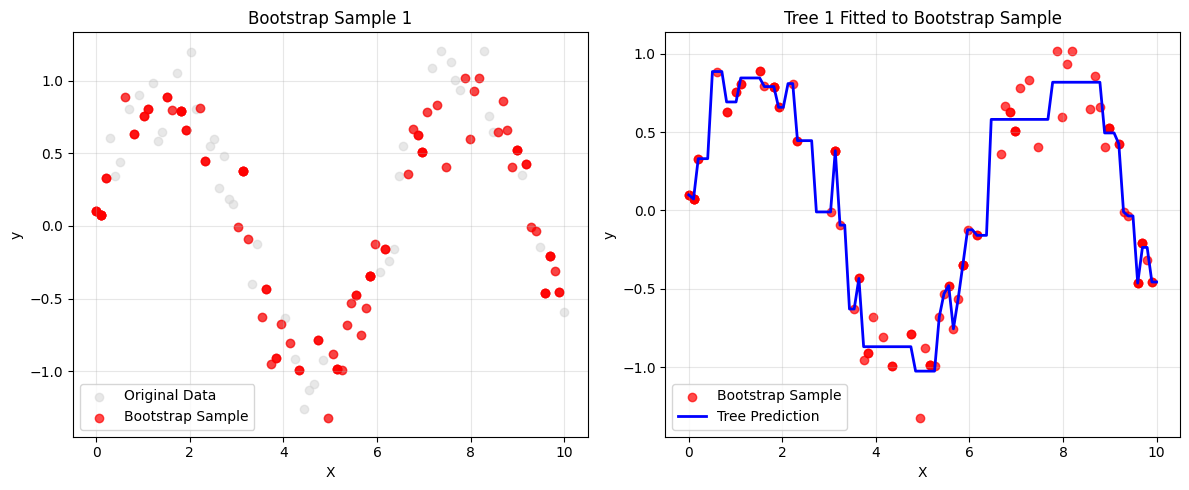

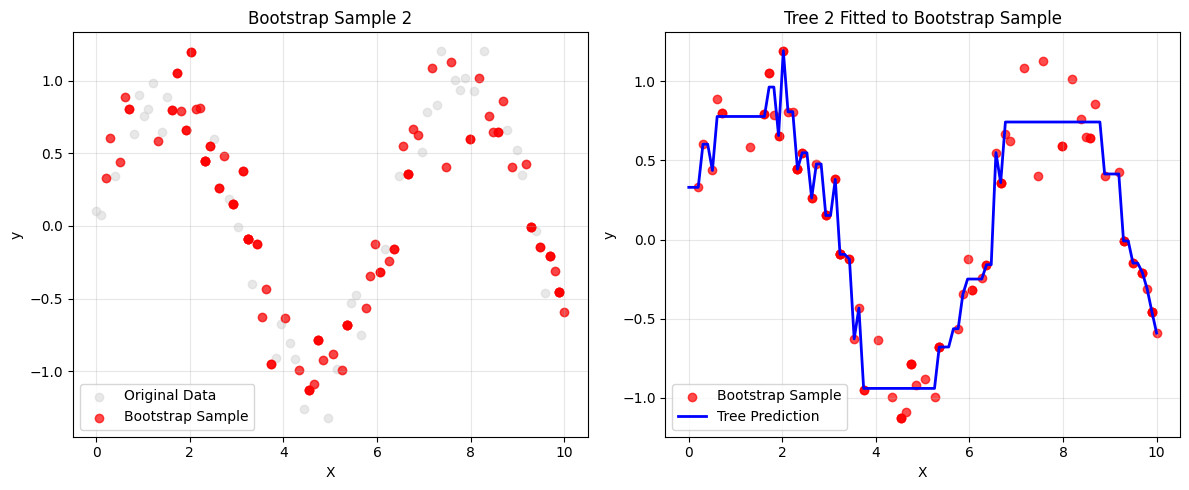

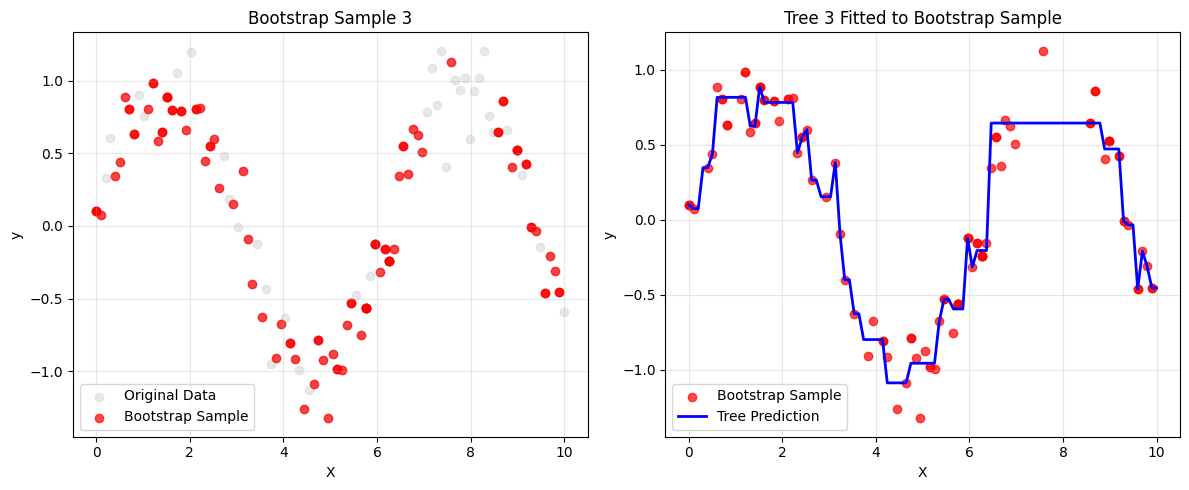

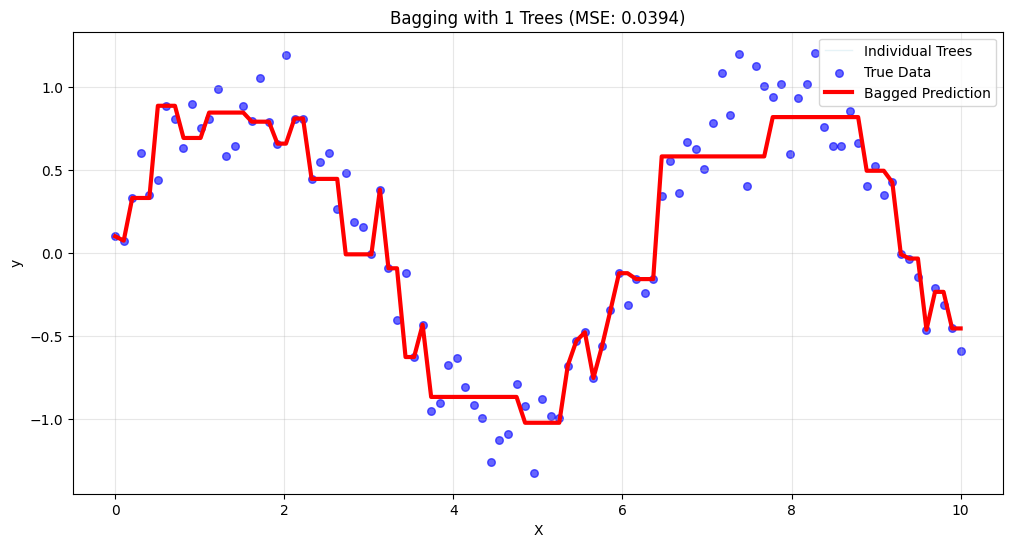

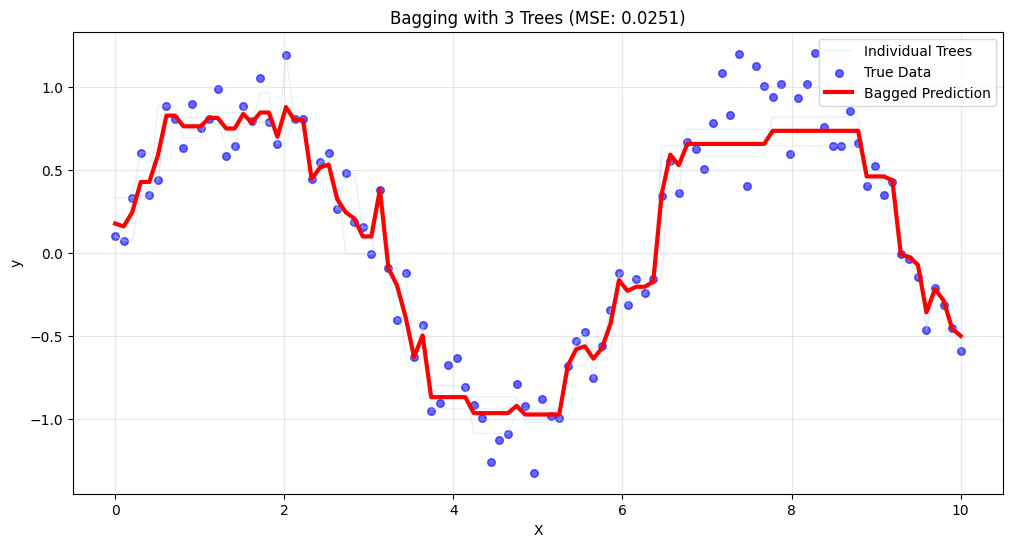

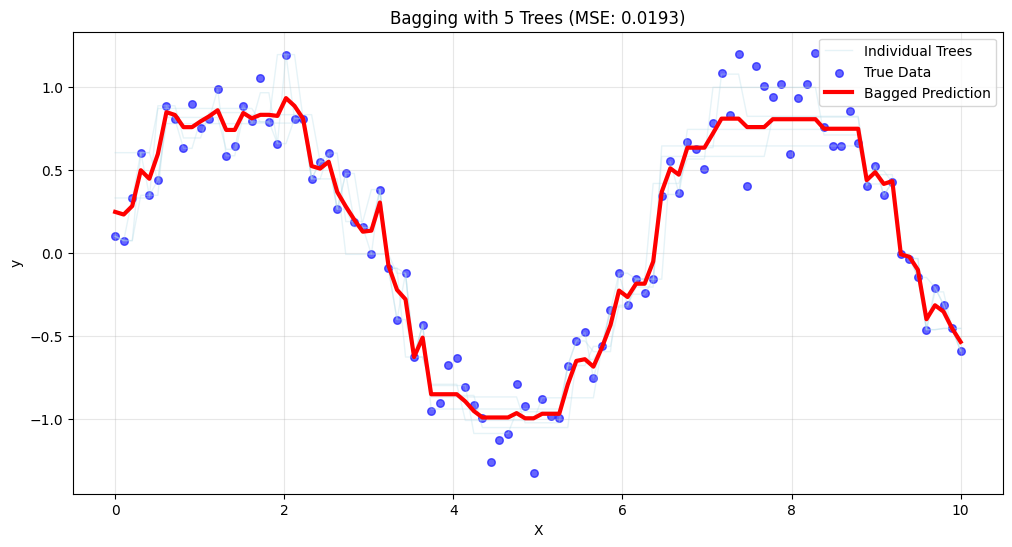

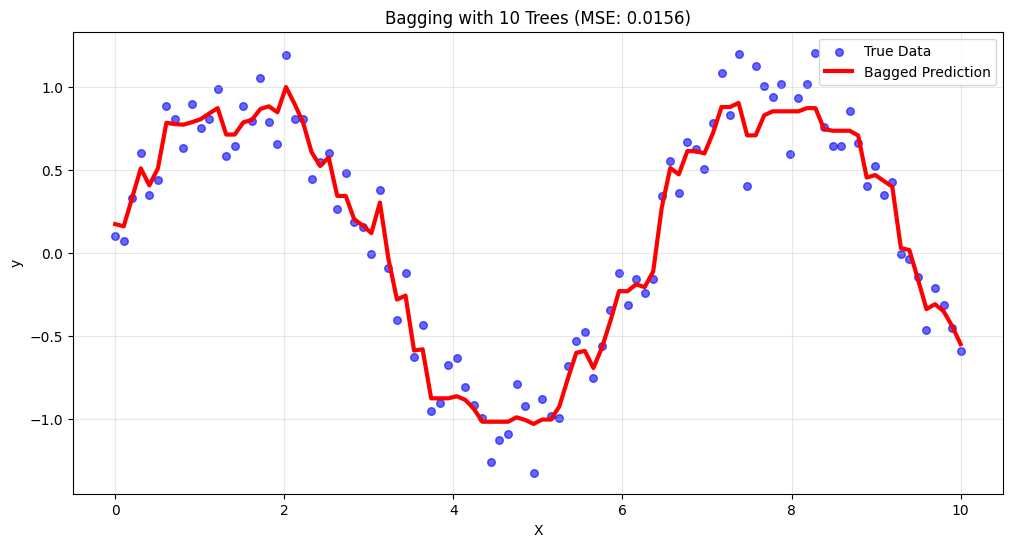

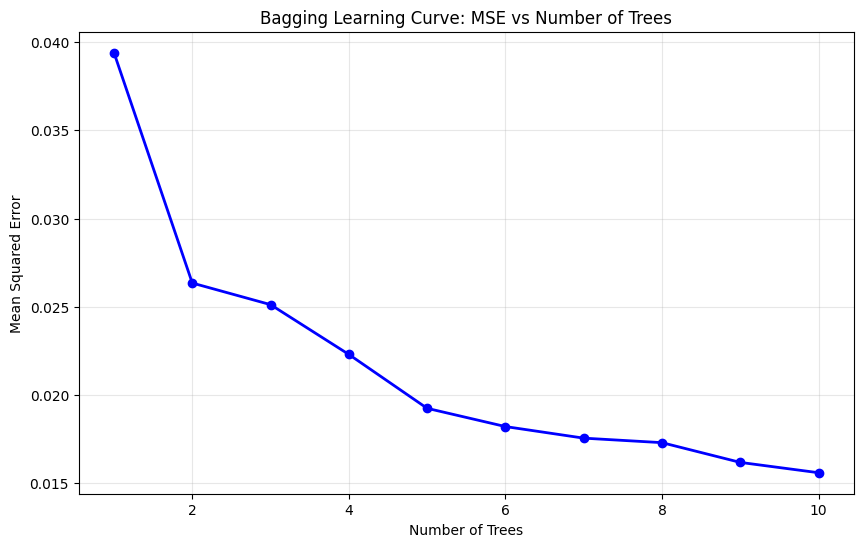


VARIANCE REDUCTION ANALYSIS
Single deep tree MSE: 0.0133
Bagged ensemble MSE: 0.0156
MSE improvement: -0.0023
Mean prediction variance across trees: 0.0157


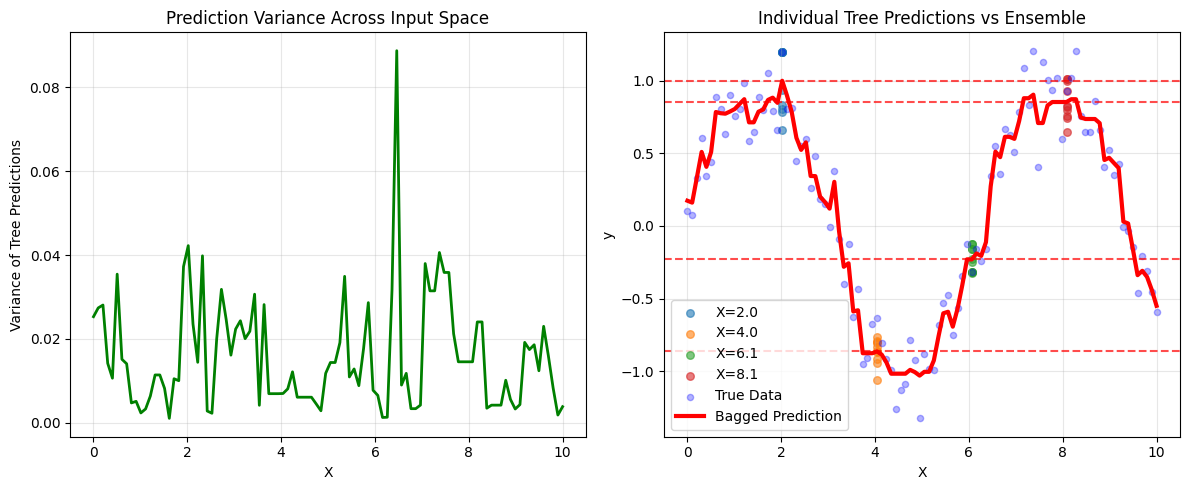


OUT-OF-BAG ESTIMATION
Out-of-bag MSE: 0.0501
OOB predictions available for 100/100 samples
Average times each sample was out-of-bag: 3.6

SUMMARY
Bagging (Bootstrap Aggregating) reduces overfitting by:
1. Training each tree on a different bootstrap sample
2. Averaging predictions to reduce variance
3. Using deep trees (high variance, low bias)
4. The ensemble has lower variance than individual trees

Final ensemble uses 10 trees with average depth 6
Achieved MSE: 0.0156


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# -----------------------------------------------------------------------------
# Step 1: Data Generation
# -----------------------------------------------------------------------------
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).flatten() + np.random.normal(scale=0.2, size=100)

# -----------------------------------------------------------------------------
# Step 2: Plotting Functions
# -----------------------------------------------------------------------------
def plot_data_and_prediction(X, y, y_pred, title, individual_preds=None):
    plt.figure(figsize=(12, 6))
    
    # Plot individual predictions if provided
    if individual_preds is not None:
        for i, pred in enumerate(individual_preds):
            plt.plot(X, pred, color='lightblue', alpha=0.3, linewidth=1, 
                    label='Individual Trees' if i == 0 else "")
    
    # Plot data and ensemble prediction
    plt.scatter(X, y, label='True Data', color='blue', alpha=0.6, s=30)
    plt.plot(X, y_pred, label='Bagged Prediction', color='red', linewidth=3)
    
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_bootstrap_sample(X, y, X_boot, y_boot, sample_idx, tree_pred=None):
    plt.figure(figsize=(12, 5))
    
    # Original data
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='lightgray', alpha=0.5, label='Original Data')
    plt.scatter(X_boot, y_boot, color='red', alpha=0.7, label='Bootstrap Sample')
    plt.title(f'Bootstrap Sample {sample_idx}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Tree prediction on bootstrap sample
    if tree_pred is not None:
        plt.subplot(1, 2, 2)
        plt.scatter(X_boot, y_boot, color='red', alpha=0.7, label='Bootstrap Sample')
        plt.plot(X, tree_pred, color='blue', linewidth=2, label='Tree Prediction')
        plt.title(f'Tree {sample_idx} Fitted to Bootstrap Sample')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# Step 3: Bagging Implementation
# -----------------------------------------------------------------------------
n_trees = 10
max_depth = 6  # Deeper trees for high variance (bagging reduces this)
n_samples = len(X)

print("="*60)
print("BAGGING DEMONSTRATION")
print("="*60)
print(f"Original dataset size: {n_samples}")
print(f"Number of trees: {n_trees}")
print(f"Tree max depth: {max_depth}")
print()

# Store trees and their predictions
trees = []
tree_predictions = []
bootstrap_info = []

# Generate bootstrap samples and fit trees
for i in range(n_trees):
    print(f"Training tree {i+1}/{n_trees}...")
    
    # Bootstrap sampling: sample with replacement
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
    X_bootstrap = X[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]
    
    # Store bootstrap info
    unique_samples = len(np.unique(bootstrap_indices))
    bootstrap_info.append({
        'indices': bootstrap_indices,
        'unique_samples': unique_samples,
        'X_boot': X_bootstrap,
        'y_boot': y_bootstrap
    })
    
    # Fit tree on bootstrap sample
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42+i)
    tree.fit(X_bootstrap, y_bootstrap)
    trees.append(tree)
    
    # Get predictions on full dataset (not just bootstrap sample)
    pred = tree.predict(X)
    tree_predictions.append(pred)
    
    print(f"  Bootstrap sample has {unique_samples}/{n_samples} unique samples")

print()
print("Bootstrap sampling statistics:")
unique_counts = [info['unique_samples'] for info in bootstrap_info]
print(f"  Average unique samples per bootstrap: {np.mean(unique_counts):.1f}")
print(f"  Range: {np.min(unique_counts)} - {np.max(unique_counts)}")

# -----------------------------------------------------------------------------
# Step 4: Show Individual Bootstrap Samples and Trees
# -----------------------------------------------------------------------------
print("\nShowing first 3 bootstrap samples...")
for i in range(min(3, n_trees)):
    info = bootstrap_info[i]
    tree_pred = tree_predictions[i]
    plot_bootstrap_sample(X, y, info['X_boot'], info['y_boot'], i+1, tree_pred)

# -----------------------------------------------------------------------------
# Step 5: Ensemble Prediction (Average)
# -----------------------------------------------------------------------------
# Bagging: average all tree predictions
ensemble_prediction = np.mean(tree_predictions, axis=0)

# Show evolution of ensemble as trees are added
cumulative_predictions = []
cumulative_mse = []

for i in range(n_trees):
    # Average of first i+1 trees
    cum_pred = np.mean(tree_predictions[:i+1], axis=0)
    cumulative_predictions.append(cum_pred)
    
    mse = np.mean((y - cum_pred)**2)
    cumulative_mse.append(mse)
    
    if i+1 in [1, 3, 5, n_trees]:  # Show selected steps
        individual_preds = tree_predictions[:i+1] if i < 5 else None
        plot_data_and_prediction(X, y, cum_pred, 
                                f"Bagging with {i+1} Trees (MSE: {mse:.4f})",
                                individual_preds)

# -----------------------------------------------------------------------------
# Step 6: Learning Curve
# -----------------------------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_trees+1), cumulative_mse, 'b-o', linewidth=2, markersize=6)
plt.title('Bagging Learning Curve: MSE vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)
plt.show()

# -----------------------------------------------------------------------------
# Step 7: Variance Reduction Analysis
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("VARIANCE REDUCTION ANALYSIS")
print("="*60)

# Calculate variance of individual tree predictions at each point
tree_predictions_array = np.array(tree_predictions)
prediction_variance = np.var(tree_predictions_array, axis=0)
mean_variance = np.mean(prediction_variance)

# Single tree performance (for comparison)
single_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
single_tree.fit(X, y)
single_tree_pred = single_tree.predict(X)
single_tree_mse = np.mean((y - single_tree_pred)**2)

# Final ensemble performance
final_mse = cumulative_mse[-1]

print(f"Single deep tree MSE: {single_tree_mse:.4f}")
print(f"Bagged ensemble MSE: {final_mse:.4f}")
print(f"MSE improvement: {single_tree_mse - final_mse:.4f}")
print(f"Mean prediction variance across trees: {mean_variance:.4f}")

# Plot variance across input space
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X, prediction_variance, 'g-', linewidth=2)
plt.title('Prediction Variance Across Input Space')
plt.xlabel('X')
plt.ylabel('Variance of Tree Predictions')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Show spread of individual predictions at a few points
sample_points = [20, 40, 60, 80]
for point in sample_points:
    preds_at_point = tree_predictions_array[:, point]
    x_pos = X[point, 0]
    plt.scatter([x_pos] * n_trees, preds_at_point, alpha=0.6, s=30, 
                label=f'X={x_pos:.1f}')
    plt.axhline(y=ensemble_prediction[point], color='red', 
                linestyle='--', alpha=0.7)

plt.scatter(X, y, color='blue', alpha=0.3, s=20, label='True Data')
plt.plot(X, ensemble_prediction, 'r-', linewidth=3, label='Bagged Prediction')
plt.title('Individual Tree Predictions vs Ensemble')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Step 8: Out-of-Bag (OOB) Estimation
# -----------------------------------------------------------------------------
print("\n" + "="*60)
print("OUT-OF-BAG ESTIMATION")
print("="*60)

oob_predictions = np.full(n_samples, np.nan)
oob_counts = np.zeros(n_samples)

for i, info in enumerate(bootstrap_info):
    # Find out-of-bag samples (not in this bootstrap sample)
    in_bag = np.unique(info['indices'])
    oob_mask = np.ones(n_samples, dtype=bool)
    oob_mask[in_bag] = False
    oob_indices = np.where(oob_mask)[0]
    
    if len(oob_indices) > 0:
        # Predict on out-of-bag samples
        tree_pred = trees[i].predict(X[oob_indices])
        
        # Accumulate OOB predictions
        for j, idx in enumerate(oob_indices):
            if np.isnan(oob_predictions[idx]):
                oob_predictions[idx] = tree_pred[j]
            else:
                oob_predictions[idx] = (oob_predictions[idx] * oob_counts[idx] + tree_pred[j]) / (oob_counts[idx] + 1)
            oob_counts[idx] += 1

# Calculate OOB score
valid_oob = ~np.isnan(oob_predictions)
if np.sum(valid_oob) > 0:
    oob_mse = np.mean((y[valid_oob] - oob_predictions[valid_oob])**2)
    print(f"Out-of-bag MSE: {oob_mse:.4f}")
    print(f"OOB predictions available for {np.sum(valid_oob)}/{n_samples} samples")
    print(f"Average times each sample was out-of-bag: {np.mean(oob_counts[valid_oob]):.1f}")
else:
    print("No OOB predictions available (increase number of trees)")

print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print("Bagging (Bootstrap Aggregating) reduces overfitting by:")
print("1. Training each tree on a different bootstrap sample")
print("2. Averaging predictions to reduce variance")
print("3. Using deep trees (high variance, low bias)")
print("4. The ensemble has lower variance than individual trees")
print(f"\nFinal ensemble uses {n_trees} trees with average depth {max_depth}")
print(f"Achieved MSE: {final_mse:.4f}")